## Method
- Classify experiment_02_1SEPPexp_convergence results on "convergence succeded" and "convergence fail"
- Plot time points on each scenario
- Analyze points dispersion 

## Hypothesis:
Trainning time-points dispersion affects SEPP convergence.

In [80]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import matplotlib.pyplot as plt
import sys
import geopandas as gpd
import geojson
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from pyproj import Proj, transform

sys.path.append("..")
from services.prediction_experiment import PredictionExperiment
from services.process_data import ProcessData

## Assets

In [2]:
geojson_bogota_file="/Users/anamaria/Desktop/dev/security_project/assets/bogota_polygon.geojson"
geojson_localidad_file="/Users/anamaria/Desktop/dev/security_project/assets/localidades_polygon.json"

with open(geojson_bogota_file) as f:
    geojson_bogota = geojson.load(f)

with open(geojson_localidad_file) as f:
    geojson_localidad = geojson.load(f)

## Built-in

In [3]:
def point_at_location(df, current_polygon, row):
    lat = row['LATITUD_Y']
    lon = row['LONGITUD_X']
    current_point = Point(lon,lat)
    if current_polygon.contains(current_point):
        return True
    else:
        return False

In [4]:
def generate_localidades_polygons(geojson_object):
    polygons = {}    
    for i in range(0,len(geojson_object['features'])):
        list_coords =list(map(lambda x: tuple(x), geojson_object['features'][i]['geometry']['coordinates'][0][0]))
        key = geojson_object['features'][i]['properties']['LocNombre']
        polygons[key] = Polygon(list_coords)
    return polygons

In [5]:
def get_localidad_polygon(polygons_list, localidad_name):
    return polygons_list[localidad_name]

In [81]:
def get_polygon_rectangular_region(region):
    inProj  = Proj("+init=EPSG:3116",preserve_units=True)
    outProj = Proj("+init=EPSG:4326") # WGS84 in degrees and not EPSG:3857 in meters)
    # swap x,y as mkennedy says
    y1,x1 =  (region.min.y, region.min.x)
    point1=transform(inProj,outProj,x1,y1)
    x1, y1 = point1

    y2,x2 = (region.max.y, region.max.x)
    point2 = transform(inProj,outProj,x2,y2)
    x2, y2 = point2
    
    return Polygon([[x1,y1],[x2,y1],[x2,y2],[x1,y2]])

In [6]:
list_coords =list(map(lambda x: tuple(x), geojson_bogota['features'][0]['geometry']['coordinates'][0]))
bogota_polygon = Polygon(list_coords)

In [8]:
localidades_polygons_list = generate_localidades_polygons(geojson_localidad)

## SIEDCO

In [10]:
csv_path = '/Users/anamaria/Desktop/dev/security_project/datasets/deduplicate_siedco_10032020.csv'
siedco_info = {'name':'SIEDCO','path':csv_path}

In [11]:
siedco_dict = {
                'date': 'FECHA_HECHO',
                'latitude': 'LATITUD_Y',
                'longitude': 'LONGITUD_X',
                'time': 'HORA_HECHO',
                'time_stamp':'TIME_STAMP'
               }

In [12]:
data = ProcessData('SIEDCO',csv_path)
df = data.get_formated_df()

## Successful vs. fail convergence scenarios
Conventions = blue (successful); red (fail)

### City scope

points out of city polygon: 0 , on interval: 2015-01-01 to 2015-01-30
points out of city polygon: 0 , on interval: 2016-01-01 to 2016-01-30
points out of city polygon: 2 , on interval: 2017-01-01 to 2017-01-30
points out of city polygon: 0 , on interval: 2018-01-01 to 2018-01-20


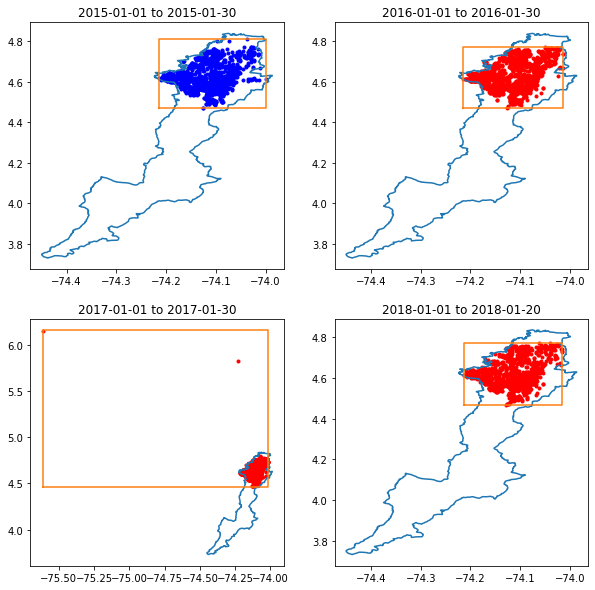

In [83]:
initial_date = '2015-01-01'
final_date = '2015-01-30'
df_filtered = ProcessData.filter_by_date(df, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
fig, ax = plt.subplots(2,2,figsize=(10,10))

ax[0,0].scatter(df_filtered.LONGITUD_X.values, df_filtered.LATITUD_Y.values, marker=".", color="blue")
ax[0,0].plot(*bogota_polygon.exterior.xy)
ax[0,0].plot(*get_polygon_rectangular_region(region).exterior.xy)
ax[0,0].set_title(initial_date+' to '+final_date)
#Check points are into Bogotá
df_filtered['in_bogota?'] = df_filtered.apply (lambda row: point_at_location(df_filtered, bogota_polygon, row), axis=1)
print("points out of city polygon:",len(df_filtered.loc[(df_filtered['in_bogota?'] == False)]),", on interval:",initial_date, "to", final_date)

initial_date = '2016-01-01'
final_date = '2016-01-30'
df_filtered = ProcessData.filter_by_date(df, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[0,1].scatter(df_filtered.LONGITUD_X.values, df_filtered.LATITUD_Y.values, marker=".", color="red")
ax[0,1].plot(*bogota_polygon.exterior.xy)
ax[0,1].plot(*get_polygon_rectangular_region(region).exterior.xy)
ax[0,1].set_title(initial_date+' to '+final_date)
#Check points are into Bogotá
df_filtered['in_bogota?'] = df_filtered.apply (lambda row: point_at_location(df_filtered, bogota_polygon, row), axis=1)
print("points out of city polygon:",len(df_filtered.loc[(df_filtered['in_bogota?'] == False)]),", on interval:",initial_date, "to", final_date)

initial_date = '2017-01-01'
final_date = '2017-01-30'
df_filtered = ProcessData.filter_by_date(df, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[1,0].scatter(df_filtered.LONGITUD_X.values, df_filtered.LATITUD_Y.values, marker=".", color="red")
ax[1,0].plot(*bogota_polygon.exterior.xy)
ax[1,0].plot(*get_polygon_rectangular_region(region).exterior.xy)
ax[1,0].set_title(initial_date+' to '+final_date)
#Check points are into Bogotá
df_filtered['in_bogota?'] = df_filtered.apply (lambda row: point_at_location(df_filtered, bogota_polygon, row), axis=1)
print("points out of city polygon:",len(df_filtered.loc[(df_filtered['in_bogota?'] == False)]),", on interval:",initial_date, "to", final_date)

initial_date = '2018-01-01'
final_date = '2018-01-20'
df_filtered = ProcessData.filter_by_date(df, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[1,1].scatter(df_filtered.LONGITUD_X.values, df_filtered.LATITUD_Y.values, marker=".", color="red")
ax[1,1].plot(*bogota_polygon.exterior.xy)
ax[1,1].plot(*get_polygon_rectangular_region(region).exterior.xy)
ax[1,1].set_title(initial_date+' to '+final_date)
#Check points are into Bogotá
df_filtered['in_bogota?'] = df_filtered.apply (lambda row: point_at_location(df_filtered, bogota_polygon, row), axis=1)
print("points out of city polygon:",len(df_filtered.loc[(df_filtered['in_bogota?'] == False)]),", on interval:",initial_date, "to", final_date)

plt.show()

### Localidad: Ciudad Bolívar

In [84]:
## Localidad, Ciudad Bolívar
df_localidad = ProcessData.filter_by_field(df, 'LOCALIDAD', 'CIUDAD BOLIVAR')
localidad_polygon = get_localidad_polygon(localidades_polygons_list, 'CIUDAD BOLIVAR')

points out of localidad polygon: 1 , on interval: 2016-01-01 to 2016-07-30
points out of localidad polygon: 11 , on interval: 2017-01-01 to 2017-07-30
points out of localidad polygon: 7 , on interval: 2015-01-01 to 2015-09-30
points out of localidad polygon: 0 , on interval: 2018-01-01 to 2018-07-30


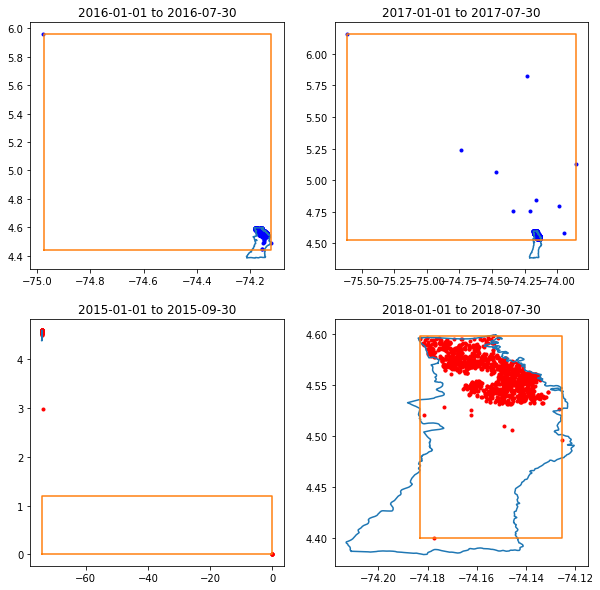

In [85]:
initial_date = '2016-01-01'
final_date = '2016-07-30'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].scatter(df_filtered.LONGITUD_X.values, df_filtered.LATITUD_Y.values, marker=".", color="blue")
ax[0,0].plot(*localidad_polygon.exterior.xy)
ax[0,0].plot(*get_polygon_rectangular_region(region).exterior.xy)
ax[0,0].set_title(initial_date+' to '+final_date)
#Check points are into Ciudad Bolivar
df_filtered['in_polygon?'] = df_filtered.apply (lambda row: point_at_location(df_filtered, localidad_polygon, row), axis=1)
print("points out of localidad polygon:",len(df_filtered.loc[(df_filtered['in_polygon?'] == False)]),", on interval:",initial_date, "to", final_date)

initial_date = '2017-01-01'
final_date = '2017-07-30'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[0,1].scatter(df_filtered.LONGITUD_X.values, df_filtered.LATITUD_Y.values, marker=".", color="blue")
ax[0,1].plot(*localidad_polygon.exterior.xy)
ax[0,1].plot(*get_polygon_rectangular_region(region).exterior.xy)
ax[0,1].set_title(initial_date+' to '+final_date)
#Check points are into Ciudad Bolivar
df_filtered['in_polygon?'] = df_filtered.apply (lambda row: point_at_location(df_filtered, localidad_polygon, row), axis=1)
print("points out of localidad polygon:",len(df_filtered.loc[(df_filtered['in_polygon?'] == False)]),", on interval:",initial_date, "to", final_date)

initial_date = '2015-01-01'
final_date = '2015-09-30'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[1,0].scatter(df_filtered.LONGITUD_X.values, df_filtered.LATITUD_Y.values, marker=".", color="red")
ax[1,0].plot(*localidad_polygon.exterior.xy)
ax[1,0].plot(*get_polygon_rectangular_region(region).exterior.xy)
ax[1,0].set_title(initial_date+' to '+final_date)
#Check points are into Ciudad Bolivar
df_filtered['in_polygon?'] = df_filtered.apply (lambda row: point_at_location(df_filtered, localidad_polygon, row), axis=1)
print("points out of localidad polygon:",len(df_filtered.loc[(df_filtered['in_polygon?'] == False)]),", on interval:",initial_date, "to", final_date)

initial_date = '2018-01-01'
final_date = '2018-07-30'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[1,1].scatter(df_filtered.LONGITUD_X.values, df_filtered.LATITUD_Y.values, marker=".", color="red")
ax[1,1].plot(*localidad_polygon.exterior.xy)
ax[1,1].plot(*get_polygon_rectangular_region(region).exterior.xy)
ax[1,1].set_title(initial_date+' to '+final_date)
#Check points are into Ciudad Bolivar
df_filtered['in_polygon?'] = df_filtered.apply (lambda row: point_at_location(df_filtered, localidad_polygon, row), axis=1)
print("points out of localidad polygon:",len(df_filtered.loc[(df_filtered['in_polygon?'] == False)]),", on interval:",initial_date, "to", final_date)


### Localidad: Santa Fe

In [86]:
## Localidad, Santa Fe
df_localidad = ProcessData.filter_by_field(df, 'LOCALIDAD', 'SANTA FE')
localidad_polygon = get_localidad_polygon(localidades_polygons_list, 'SANTA FE')

points out of localidad polygon: 9 , on interval: 2015-01-01 to 2016-12-30
points out of localidad polygon: 5 , on interval: 2017-01-01 to 2018-02-28
points out of localidad polygon: 0 , on interval: 2018-01-01 to 2018-12-31
points out of localidad polygon: 9 , on interval: 2015-01-01 to 2017-01-01


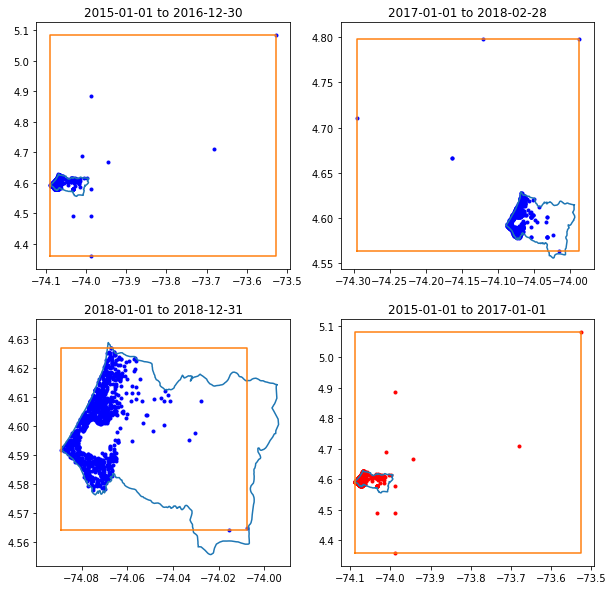

In [87]:
initial_date = '2015-01-01'
final_date = '2016-12-30'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].scatter(df_filtered.LONGITUD_X.values, df_filtered.LATITUD_Y.values, marker=".", color="blue")
ax[0,0].plot(*localidad_polygon.exterior.xy)
ax[0,0].plot(*get_polygon_rectangular_region(region).exterior.xy)
ax[0,0].set_title(initial_date+' to '+final_date)
#Check points are into Santa Fe
df_filtered['in_polygon?'] = df_filtered.apply (lambda row: point_at_location(df_filtered, localidad_polygon, row), axis=1)
print("points out of localidad polygon:",len(df_filtered.loc[(df_filtered['in_polygon?'] == False)]),", on interval:",initial_date, "to", final_date)

initial_date = '2017-01-01'
final_date = '2018-02-28'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[0,1].scatter(df_filtered.LONGITUD_X.values, df_filtered.LATITUD_Y.values, marker=".", color="blue")
ax[0,1].plot(*localidad_polygon.exterior.xy)
ax[0,1].plot(*get_polygon_rectangular_region(region).exterior.xy)
ax[0,1].set_title(initial_date+' to '+final_date)
#Check points are into Santa Fe
df_filtered['in_polygon?'] = df_filtered.apply (lambda row: point_at_location(df_filtered, localidad_polygon, row), axis=1)
print("points out of localidad polygon:",len(df_filtered.loc[(df_filtered['in_polygon?'] == False)]),", on interval:",initial_date, "to", final_date)

initial_date = '2018-01-01'
final_date = '2018-12-31'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[1,0].scatter(df_filtered.LONGITUD_X.values, df_filtered.LATITUD_Y.values, marker=".", color="blue")
ax[1,0].plot(*localidad_polygon.exterior.xy)
ax[1,0].plot(*get_polygon_rectangular_region(region).exterior.xy)
ax[1,0].set_title(initial_date+' to '+final_date)
#Check points are into Santa Fe
df_filtered['in_polygon?'] = df_filtered.apply (lambda row: point_at_location(df_filtered, localidad_polygon, row), axis=1)
print("points out of localidad polygon:",len(df_filtered.loc[(df_filtered['in_polygon?'] == False)]),", on interval:",initial_date, "to", final_date)

initial_date = '2015-01-01'
final_date = '2017-01-01'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[1,1].scatter(df_filtered.LONGITUD_X.values, df_filtered.LATITUD_Y.values, marker=".", color="red")
ax[1,1].plot(*localidad_polygon.exterior.xy)
ax[1,1].plot(*get_polygon_rectangular_region(region).exterior.xy)
ax[1,1].set_title(initial_date+' to '+final_date)
#Check points are into Santa Fe
df_filtered['in_polygon?'] = df_filtered.apply (lambda row: point_at_location(df_filtered, localidad_polygon, row), axis=1)
print("points out of localidad polygon:",len(df_filtered.loc[(df_filtered['in_polygon?'] == False)]),", on interval:",initial_date, "to", final_date)



## Appendix: Convergence successful scenarios 

In [ ]:
## City scope
initial_date = '2015-01-01'
final_date = '2015-01-30'
df_filtered = ProcessData.filter_by_date(df, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="black")

initial_date = '2015-01-01'
final_date = '2015-01-31'
df_filtered = ProcessData.filter_by_date(df, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[0,1].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="black")

initial_date = '2015-01-01'
final_date = '2015-02-01'
df_filtered = ProcessData.filter_by_date(df, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[1,0].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="black")


In [ ]:
## Localidad, Ciudad Bolívar
df_localidad = ProcessData.filter_by_field(df, 'LOCALIDAD', 'CIUDAD BOLIVAR')

In [ ]:
initial_date = '2016-01-01'
final_date = '2016-07-30'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
fig, ax = plt.subplots(3,2,figsize=(10,10))
ax[0,0].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="black")

initial_date = '2016-01-01'
final_date = '2016-07-31'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[0,1].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="black")

initial_date = '2016-01-01'
final_date = '2016-08-01'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[1,0].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="black")

initial_date = '2017-01-01'
final_date = '2017-07-30'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[1,1].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="blue")

initial_date = '2017-01-01'
final_date = '2017-07-31'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[2,0].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="blue")

initial_date = '2017-01-01'
final_date = '2017-08-01'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[2,1].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="blue")

In [ ]:
## Localidad, Santa Fe
df_localidad = ProcessData.filter_by_field(df, 'LOCALIDAD', 'SANTA FE')

In [ ]:
initial_date = '2015-01-01'
final_date = '2016-12-30'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
fig, ax = plt.subplots(3,2,figsize=(10,10))
ax[0,0].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="black")

initial_date = '2015-01-01'
final_date = '2016-12-31'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[0,1].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="black")

## Despite is on the same iteration loop, time elapsed on simulation was high (interrupted before get any result)
initial_date = '2015-01-01'
final_date = '2017-01-01'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[1,0].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="black")
#########

initial_date = '2017-01-01'
final_date = '2018-02-28'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[1,1].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="blue")

initial_date = '2018-01-01'
final_date = '2018-12-31'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[2,0].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="black")

initial_date = '2018-01-01'
final_date = '2019-01-01'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[2,1].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="black")